In [2]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')  # Use Tkinter backend

In [13]:
plt.ion()

n_observations = 100
fig, ax = plt.subplots(1,1)
xs = np.linspace(-3.0, 3.0, n_observations).astype(np.float32)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations).astype(np.float32)
scatter = ax.scatter(xs, ys)

In [4]:
class PolynomialModel(tf.Module):
    def __init__(self):
        self.bias = tf.Variable(tf.random.normal([1], dtype=tf.float32), name='bias')
        self.weights = [tf.Variable(tf.random.normal([1], dtype=tf.float32), name=f'weight_{i}') for i in range(1,5)]
        
    def __call__(self, x):
        y_pred = self.bias
        for i, w in enumerate(self.weights):
            y_pred = y_pred + w * tf.cast(tf.pow(x, i+1), tf.float32)
        return y_pred

In [6]:
model = PolynomialModel()

In [7]:
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [8]:
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [9]:
n_epochs = 1000
prev_training_cost = 0.0

In [14]:
for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
        
        y_pred = model(xs)
        loss = compute_loss(ys, y_pred)
        
    gradients = tape.gradient(loss, [model.bias] + model.weights)
    gradients = [tf.clip_by_value(grad, -1.0, 1.0) for grad in gradients]
    optimizer.apply_gradients(zip(gradients, [model.bias] + model.weights))
    
    training_cost = loss.numpy()
    print(training_cost)
    
    if epoch % 100 == 0:
        scatter.set_offsets(np.column_stack((xs, y_pred.numpy())))
        plt.pause(0.01)  # Pause briefly to update the plot
        
    # Allow the training to quit if we've reached a minimum
    if np.abs(prev_training_cost - training_cost) < 0.000001:
        break
    prev_training_cost = training_cost

0.52484286
0.4931785
0.5517751
0.49340102
0.55141395
0.49361145
0.55109435
0.4938094
0.55081046
0.49399483
0.55055696
0.49416786
0.5503297
0.49432918
0.55012524
0.4944791
0.5499406
0.49461845
0.5497733
0.49474794
0.54962116
0.4948682
0.5494824
0.49497986
0.54935545
0.49505883
0.5492572
0.49506393
0.54921585
0.49515355
0.5491128
0.4951382
0.5490897
0.49523222
0.5489859
0.4952169
0.54896563
0.49530587
0.54886824
0.49528858
0.5488519
0.49537265
0.54876035
0.49535578
0.5487459
0.49542084
0.5486691
0.49537358
0.5486761
0.49541223
0.54861796
0.49535286
0.54863375
0.49538013
0.5485846
0.49531516
0.548605
0.4953374
0.54856044
0.49527386
0.54858094
0.4952935
0.54853934
0.4952296
0.54856104
0.49524784
0.5485215
0.4951878
0.5485415
0.49520516
0.5485039
0.49514526
0.5485247
0.49516192
0.54848856
0.49510628
0.54850715
0.49512213
0.5484727
0.49506652
0.5484924
0.49508187
0.5484591
0.49503064
0.54847646
0.49504536
0.5484447
0.49499366
0.5484632
0.4950078
0.5484326
0.4949607
0.5484485
0.4949744
0.5484

0.49404708
0.54814625
0.49404702
0.5481463
0.49404702
0.5481462
0.49404693
0.5481463
0.494047
0.5481463
0.49404678
0.5481463
0.4940468
0.5481463
0.49404672
0.54814625
0.49404678
0.5481462
0.49404672
0.5481463
0.49404675
0.5481462
0.49404672
0.5481462
0.49404672
0.5481461
0.49404648
0.5481462
0.49404648
0.5481462
0.4940464
0.5481463
0.4940464
0.54814625
0.49404636
0.5481463
0.49404636
0.5481462
0.49404633
0.54814625
0.49404624
0.5481463
0.49404618
0.5481463
0.49404612
0.5481463
0.49404612
0.5481463
0.4940461
0.5481463
0.49404606
0.5481463
0.49404618
0.54814625
0.49404606
0.5481462
0.49404594
0.5481462
0.49404597
0.5481462
0.4940461
0.5481461
0.49404597
0.5481462
0.49404594
0.5481462
0.49404597
0.5481462
0.49404594
0.5481462
0.49404594
0.5481462
0.4940459
0.5481462
0.49404594
0.5481461
0.49404582
0.5481461
0.49404582
0.5481462
0.49404576
0.5481462
0.4940457
0.5481462
0.4940457
0.5481462
0.4940458
0.5481461
0.4940457
0.5481462
0.49404564
0.5481461
0.4940457
0.54814607
0.49404556
0.5481461

In [11]:
ax.set_ylim([-3, 3])
plt.show()
plt.waitforbuttonpress()

False

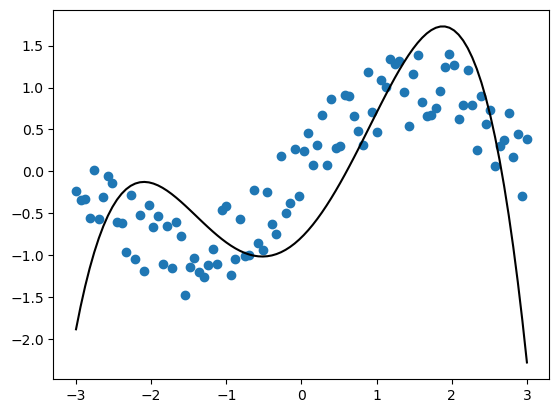

In [16]:
# all in one
%matplotlib inline
plt.scatter(xs, ys)
plt.plot(xs, model(xs), 'k', alpha=1)
plt.show()